# Description

This notebook calculates the Bayesian posterior distribution of the binomial single trial success probability, given the number of tests conducted ```n_trials``` and the number of successful tests ```n_successes``` out of these, using a uniform prior distribution.

This notebook produces a graph that tells you how much belief you can put into any of the possible single trial success probabilities between 0 (always fails) and 1 (always succeeds) after having done a test with ```n_trials``` trials of which ```n_successes``` were successful. This result depends on a so-called prior distribution that models your belief in different possible single trial success probabilities before the test. By default we choose a uniform prior, since this does not skew the results (the maximum belief will be for exactly the success rate of your test run).

__Note__
1. All probabilities are given as numbers between 0 and 1, where 0 represents "never" and 1 represents 100% certainty.
2. The calculated degree of belief is __NOT__ conservative. It depends on the chosen prior and can be both too high and too low. If you interpret the posterior probability as a confidence in the respective single trial success probability and use this evaluation as a hypothesis test, it is possible that the real single trial success probability is worse than hypothesized more often than the confidence suggests. This is undesirable in some situations but useful in others where the systematic underestimation of the coverage by binomial confidences leads to unreasonably large requirements for test repetitions.

# Parameters

In [1]:
n_trials = 10
n_successes = 9

# Evaluation

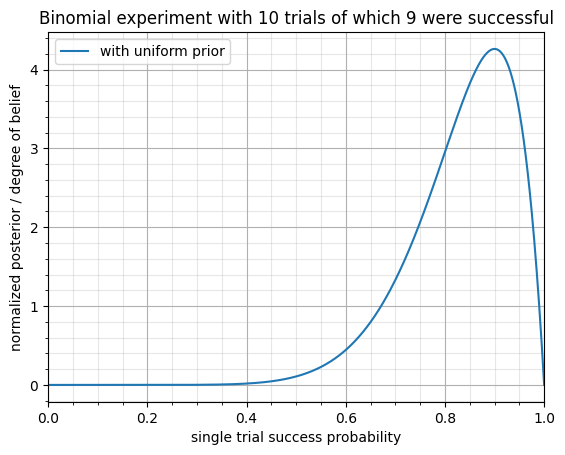

In [2]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
import scipy.optimize as opt
from scipy import special
from scipy import integrate

mp.mp.dps = 50 #use 50 decimal digits precision in mpmath calculations

def likelihood_binom_p(p, n_trials, n_successes, prior):
    return mp.mpf(p)**n_successes * mp.mpf(1-p)**(n_trials-n_successes) * prior(p)
    
likelihood_binom_p_vectorized = np.vectorize(likelihood_binom_p)

p = np.linspace(0, 1, 1000)

prior = lambda p: 1
likelihood_norm = integrate.quad(likelihood_binom_p, 0, 1, args=(n_trials, n_successes, prior))[0]
likelihoods = likelihood_binom_p_vectorized(p, n_trials, n_successes, prior=prior) / likelihood_norm
plt.plot(p, likelihoods, label='with uniform prior')

# prior = lambda p: (p*(1-p))**0.5
# likelihood_norm = integrate.quad(likelihood_binom_p, 0, 1, args=(n_trials, n_successes, prior))[0]
# likelihoods = likelihood_binom_p_vectorized(p, n_trials, n_successes, prior=prior) / likelihood_norm
# plt.plot(p, likelihoods, label='posterior with Jeffrey\'s prior')
# plt.plot(p, prior(p), label='Jeffrey\'s prior')

plt.gca().set_title('Binomial experiment with {} trials of which {} were successful'.format(n_trials, n_successes))
plt.gca().set_xlabel('single trial success probability'.format(n_trials))
plt.gca().set_ylabel('normalized posterior / degree of belief')
plt.gca().tick_params(axis='x', which='minor', bottom=True)
plt.gca().minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', alpha=0.3);
plt.legend()

plt.gca().set_xlim([0, 1]); #change plot range here